### Applying Traditional Machine Learning Algorithm 
#### Md. Asifur Rahman Asif
#### ID: 18.02.04.114

In [55]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data

In [56]:
df = pd.read_csv("FloodTrain.csv")
#test = pd.read_excel("FloodTest.xlsx")

display(df.head(10))

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN
5,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,8,Barisal,1949,9,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,NaN
9,9,Barisal,1949,10,34.0,24.7,128.0,78.0,0.490741,3.1,7.000000,41950,536809.8,510151.9,22.7,90.36,4,1949.10,NaN


#### Data Preprocessing

In [57]:
df.isnull().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood                16051
dtype: int64

In [58]:
df['Flood'] = df['Flood'].fillna(0)

In [59]:
df['Flood'] = df['Flood'].astype('int64')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

#### Label Encoding

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['Station_Names']

for col in columns:
    df[col]=le.fit_transform(df[col])
    
print(le.classes_)

['Barisal' 'Bhola' 'Bogra' 'Chandpur' 'Chittagong (City-Ambagan)'
 'Chittagong (IAP-Patenga)' 'Comilla' "Cox's Bazar" 'Dhaka' 'Dinajpur'
 'Faridpur' 'Feni' 'Hatiya' 'Ishurdi' 'Jessore' 'Khepupara' 'Khulna'
 'Kutubdia' 'Madaripur' 'Maijdee Court' 'Mongla' 'Mymensingh' 'Patuakhali'
 'Rajshahi' 'Rangamati' 'Rangpur' 'Sandwip' 'Satkhira' 'Sitakunda'
 'Srimangal' 'Sylhet' 'Tangail' 'Teknaf']


#### Random Oversampling Imbalanced Datasets

In [62]:
df['Flood'].value_counts()

0    16412
1     4132
Name: Flood, dtype: int64

In [63]:
df

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,0
1,1,0,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,0
2,2,0,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,0
3,3,0,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,0
4,4,0,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,20539,32,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1
20540,20540,32,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,0
20541,20541,32,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,0
20542,20542,32,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,0


In [64]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(sampling_strategy='minority', random_state=42)
#oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Flood', axis=1), df['Flood'])
#df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [65]:
df

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,0
1,1,0,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,0
2,2,0,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,0
3,3,0,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,0
4,4,0,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,20539,32,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1
20540,20540,32,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,0
20541,20541,32,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,0
20542,20542,32,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,0


#### Standardization

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(df.drop('Flood', axis=1))

StandardScaler()

In [69]:
scaled_features =scaler.transform(df.drop('Flood', axis=1))

In [70]:
scaled_features

array([[-1.7319665 , -1.64737873, -2.0631562 , ..., -0.12013518,
        -0.69165038, -2.06627539],
       [-1.73179788, -1.64737873, -2.0631562 , ..., -0.12013518,
        -0.69165038, -2.06570754],
       [-1.73162926, -1.64737873, -2.0631562 , ..., -0.12013518,
        -0.69165038, -2.0651397 ],
       ...,
       [ 1.73162926,  1.74471314,  1.57106615, ...,  1.59359493,
        -0.69165038,  1.57305059],
       [ 1.73179788,  1.74471314,  1.57106615, ...,  1.59359493,
        -0.69165038,  1.57361844],
       [ 1.7319665 ,  1.74471314,  1.57106615, ...,  1.59359493,
        -0.69165038,  1.57418628]])

In [71]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[1:])

In [72]:
df_feat=df_feat.drop('Flood', axis=1)

In [73]:
df_feat

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,-1.731967,-1.647379,-2.063156,-1.593255,-1.370192,-1.791480,-0.825871,-1.499448,-0.922217,-1.384926,0.808311,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
1,-1.731798,-1.647379,-2.063156,-1.303572,0.151966,-1.205559,-0.788478,-2.151531,-0.725028,-1.240955,1.084628,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
2,-1.731629,-1.647379,-2.063156,-1.013890,1.099087,-0.195349,-0.792633,-2.673197,-0.316438,-0.953011,0.979944,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
3,-1.731461,-1.647379,-2.063156,-0.724207,0.151966,0.552207,-0.244203,-1.108198,0.342636,0.198764,1.029851,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
4,-1.731292,-1.647379,-2.063156,-0.434524,0.727003,0.774453,0.075714,-0.456116,0.276906,0.294745,0.359144,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,1.731292,1.744713,1.571066,0.434524,-0.321594,0.855270,2.709837,1.108883,1.040792,1.302549,-1.498387,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165
20540,1.731461,1.744713,1.571066,0.724207,-0.287769,0.915882,0.541048,1.108883,1.520441,1.254558,-1.269543,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165
20541,1.731629,1.744713,1.571066,1.013890,-0.118640,0.734044,0.300071,0.717633,1.040792,0.438717,-0.468590,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165
20542,1.731798,1.744713,1.571066,1.303572,-0.321594,-0.235757,-0.825871,-0.064866,0.657073,-0.857030,1.133318,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165


In [74]:
df_feat = pd.concat([pd.DataFrame(df_feat), pd.DataFrame(df['Flood'])], axis=1)

In [75]:
df_feat

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,-1.731967,-1.647379,-2.063156,-1.593255,-1.370192,-1.791480,-0.825871,-1.499448,-0.922217,-1.384926,0.808311,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165,0
1,-1.731798,-1.647379,-2.063156,-1.303572,0.151966,-1.205559,-0.788478,-2.151531,-0.725028,-1.240955,1.084628,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165,0
2,-1.731629,-1.647379,-2.063156,-1.013890,1.099087,-0.195349,-0.792633,-2.673197,-0.316438,-0.953011,0.979944,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165,0
3,-1.731461,-1.647379,-2.063156,-0.724207,0.151966,0.552207,-0.244203,-1.108198,0.342636,0.198764,1.029851,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165,0
4,-1.731292,-1.647379,-2.063156,-0.434524,0.727003,0.774453,0.075714,-0.456116,0.276906,0.294745,0.359144,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,1.731292,1.744713,1.571066,0.434524,-0.321594,0.855270,2.709837,1.108883,1.040792,1.302549,-1.498387,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165,1
20540,1.731461,1.744713,1.571066,0.724207,-0.287769,0.915882,0.541048,1.108883,1.520441,1.254558,-1.269543,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165,0
20541,1.731629,1.744713,1.571066,1.013890,-0.118640,0.734044,0.300071,0.717633,1.040792,0.438717,-0.468590,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165,0
20542,1.731798,1.744713,1.571066,1.303572,-0.321594,-0.235757,-0.825871,-0.064866,0.657073,-0.857030,1.133318,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165,0


In [76]:
df['Flood'].value_counts()

0    16412
1     4132
Name: Flood, dtype: int64

In [77]:
df_feat['Flood'].value_counts()

0    16412
1     4132
Name: Flood, dtype: int64

In [78]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# oversampled_X, oversampled_Y = oversample.fit_resample(df_feat.drop('Flood', axis=1), df_feat['Flood'])
# df_feat = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [79]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = oversample.fit_resample(df_feat.drop('Flood', axis=1), df_feat['Flood'])
df_feat = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [80]:
df_feat['Flood'].value_counts()

0    16412
1    16083
Name: Flood, dtype: int64

In [81]:
df_feat

,Flood,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,-1.731967,-1.647379,-2.063156,-1.593255,-1.370192,-1.791480,-0.825871,-1.499448,-0.922217,-1.384926,0.808311,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
1,0,-1.731798,-1.647379,-2.063156,-1.303572,0.151966,-1.205559,-0.788478,-2.151531,-0.725028,-1.240955,1.084628,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
2,0,-1.731629,-1.647379,-2.063156,-1.013890,1.099087,-0.195349,-0.792633,-2.673197,-0.316438,-0.953011,0.979944,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
3,0,-1.731461,-1.647379,-2.063156,-0.724207,0.151966,0.552207,-0.244203,-1.108198,0.342636,0.198764,1.029851,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
4,0,-1.731292,-1.647379,-2.063156,-0.434524,0.727003,0.774453,0.075714,-0.456116,0.276906,0.294745,0.359144,0.408091,-0.111122,-0.529267,-0.542452,-0.120135,-0.69165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,1,1.722091,1.744713,1.308120,0.724207,0.188378,0.805853,1.325400,1.096839,-0.483702,1.062596,-0.660448,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165
32491,1,1.725630,1.744713,1.402797,1.008571,0.180202,0.856383,1.667213,0.978466,1.126153,0.779939,-0.858562,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165
32492,1,1.729728,1.744713,1.530203,0.249072,-0.386559,0.835065,3.910370,1.286225,1.290484,1.481056,-1.633394,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165
32493,1,1.728892,1.744713,1.508457,0.144841,-0.348481,0.872193,3.480914,1.239300,1.490921,1.411245,-1.654862,1.722582,1.594962,-2.069986,-2.126576,1.593595,-0.69165


#### Train test seperation

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
#X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)

X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period','Flood'],axis=1)
y = df_feat['Flood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(6499, 5)

#### KNN

In [84]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=6, metric='manhattan', n_neighbors=8, weights='distance')

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=6, metric='manhattan',
                     n_neighbors=8, weights='distance')

#### Training Accuracy

In [86]:
pred = knn.predict(X_train)

In [87]:
accuracy = accuracy_score(y_train,pred)
print(accuracy)

0.9998845976304047


#### Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(knn,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [89]:
knn_acc

array([0.93326923, 0.92787074, 0.92556261, 0.93479515, 0.93729563])

In [90]:
knn_acc.mean()

0.9317586740053561

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

#### Test Accuracy

In [92]:
pred = knn.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9336821049392214


#### Confusion Matrix

In [94]:
confusion_matrix_ = confusion_matrix(y_test, pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, pred))


confusion_matrix: 
 [[2887  352]
 [  79 3181]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3239
           1       0.90      0.98      0.94      3260

    accuracy                           0.93      6499
   macro avg       0.94      0.93      0.93      6499
weighted avg       0.94      0.93      0.93      6499



In [95]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)


True Negatives =  2887
False Negatives =  79
False Positives =  352
True Positives =  3181


#### True Positive Rate, Flase Positive Rate

In [96]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.98
False Positive Rate =  0.11


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

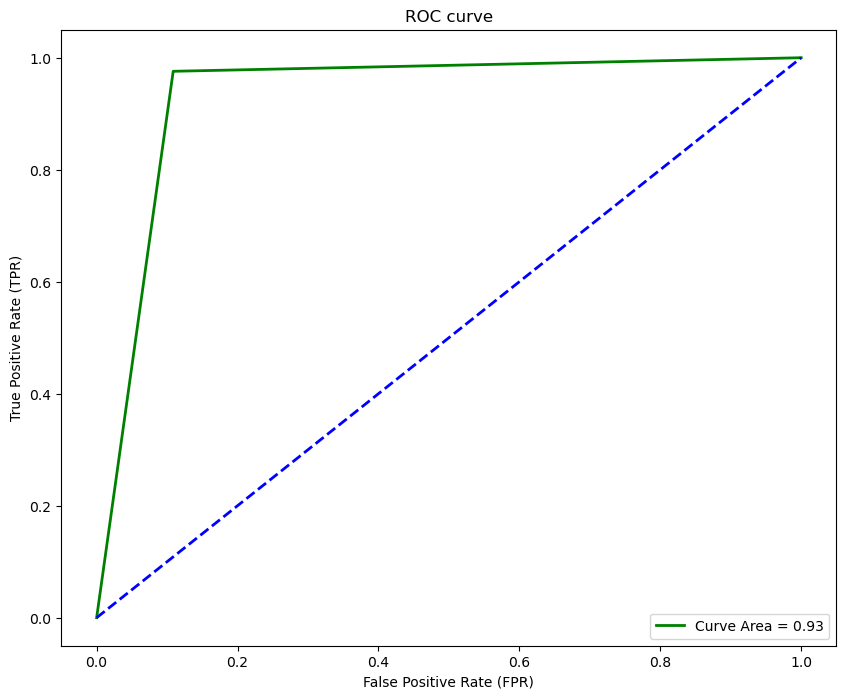

In [97]:
fpr, tpr, thr = roc_curve(y_test, pred)
auc = np.round(roc_auc_score(y_test, pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

>1, train: 1.000, test: 0.935
>2, train: 0.982, test: 0.927
>3, train: 0.960, test: 0.928
>4, train: 0.958, test: 0.929
>5, train: 0.946, test: 0.927
>6, train: 0.947, test: 0.929
>7, train: 0.940, test: 0.924
>8, train: 0.942, test: 0.928
>9, train: 0.937, test: 0.925
>10, train: 0.937, test: 0.924
>11, train: 0.933, test: 0.922
>12, train: 0.934, test: 0.923
>13, train: 0.930, test: 0.922
>14, train: 0.931, test: 0.923
>15, train: 0.929, test: 0.920
>16, train: 0.929, test: 0.921
>17, train: 0.927, test: 0.920
>18, train: 0.927, test: 0.920
>19, train: 0.925, test: 0.919


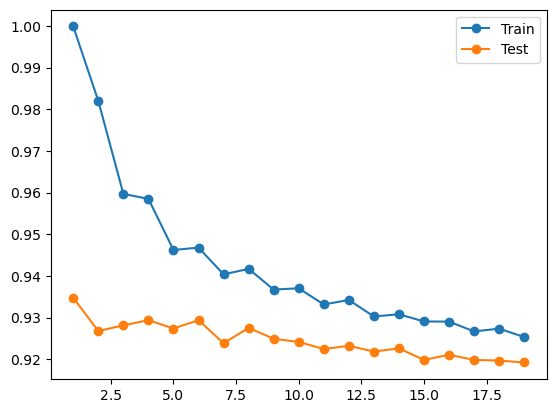

In [98]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

train_scores, test_scores = list(), list()
values = [i for i in range(1, 20)]
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [99]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

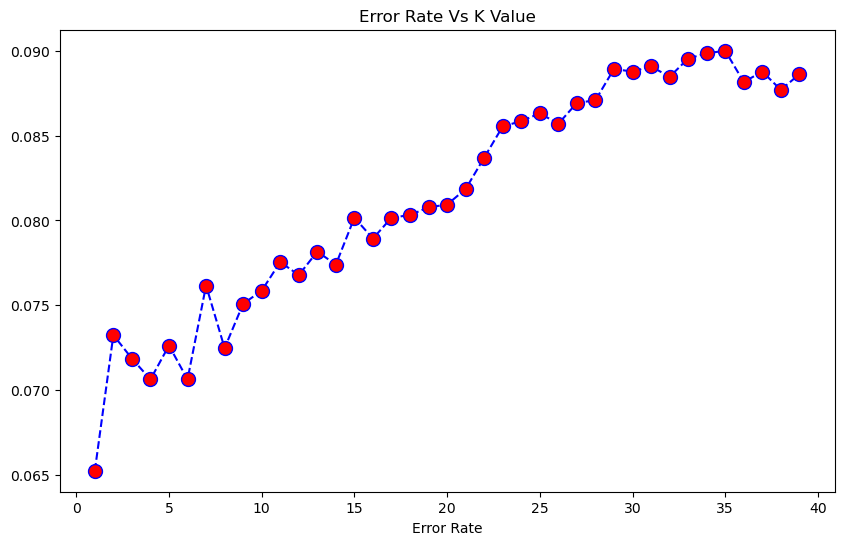

In [100]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title("Error Rate Vs K Value")

plt.xlabel('K')
plt.xlabel('Error Rate')
plt.show()

#### Determining the best value of K

In [101]:
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    
    confusion_matrix_ = confusion_matrix(y_test, pred)

    TN = confusion_matrix_[0,0]
   
    FN = confusion_matrix_[1,0]

    FP = confusion_matrix_[0,1]

    TP = confusion_matrix_[1,1]

    accuracy = accuracy_score(y_test,pred)
    
    precision = np.round(TP/(TP+FP), 2)
    recall = np.round(TP/(TP+FN), 2)
    f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)
    
    print(i)
    print("Accuracy = ",accuracy)
    print("Precision = ", precision)
    print("Recall = ", recall)
    print("f1 score = ", f1_score_)
    print()

1
Accuracy =  0.9347591937221111
Precision =  0.91
Recall =  0.96
f1 score =  0.93

2
Accuracy =  0.9267579627635021
Precision =  0.93
Recall =  0.92
f1 score =  0.92

3
Accuracy =  0.928142791198646
Precision =  0.9
Recall =  0.97
f1 score =  0.93

4
Accuracy =  0.9293737498076627
Precision =  0.91
Recall =  0.95
f1 score =  0.93

5
Accuracy =  0.9273734420680104
Precision =  0.9
Recall =  0.97
f1 score =  0.93

6
Accuracy =  0.9293737498076627
Precision =  0.91
Recall =  0.96
f1 score =  0.93

7
Accuracy =  0.9238344360670873
Precision =  0.89
Recall =  0.97
f1 score =  0.93

8
Accuracy =  0.9275273118941375
Precision =  0.9
Recall =  0.96
f1 score =  0.93

9
Accuracy =  0.924911524849977
Precision =  0.89
Recall =  0.97
f1 score =  0.93

10
Accuracy =  0.9241421757193414
Precision =  0.9
Recall =  0.96
f1 score =  0.93

11
Accuracy =  0.9224496076319434
Precision =  0.89
Recall =  0.97
f1 score =  0.93

12
Accuracy =  0.9232189567625788
Precision =  0.9
Recall =  0.96
f1 score =  0.

#### Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
knn_params = {   
    "n_neighbors": range(1, 20, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(1, 35, 5)
   
}

knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

kfinal_model = knn.set_params(**grid_result.best_params_)
kfinal_model.fit(X_train,y_train)
kpred = kfinal_model.predict(X_test)

print(classification_report(y_test, kpred))
print(confusion_matrix(y_test, kpred))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3239
           1       0.91      0.96      0.94      3260

    accuracy                           0.94      6499
   macro avg       0.94      0.94      0.94      6499
weighted avg       0.94      0.94      0.94      6499

[[2948  291]
 [ 128 3132]]
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


#### 'leaf_size': 6, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'

#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

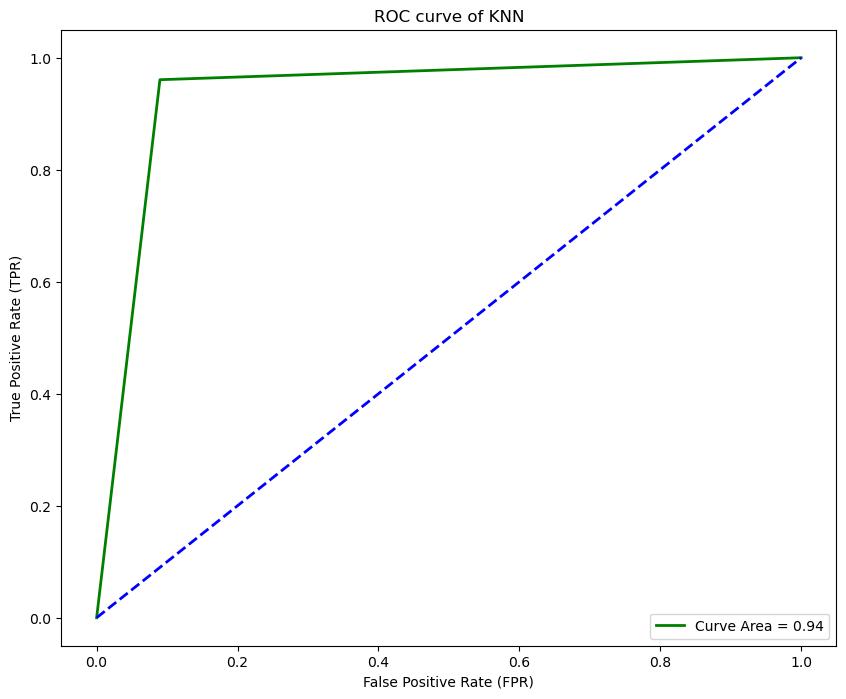

In [103]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, kpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve of KNN')
plt.legend(loc="lower right")
plt.show()

#### Training Accuracy

In [104]:
predh = kfinal_model.predict(X_train)

In [105]:
accuracy = accuracy_score(y_train,predh)
print(accuracy)

0.9998845976304047


#### Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knnh_acc=cross_val_score(kfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knnh_proba=cross_val_predict(kfinal_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [107]:
knnh_acc

array([0.93538462, 0.93056357, 0.92671668, 0.93710329, 0.93575688])

In [108]:
knnh_acc.mean()

0.9331050054004468

#### Test Accuracy

In [109]:
pred = kfinal_model.predict(X_test) 

In [110]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9355285428527466


#### Confusion Matrix

In [111]:
confusion_matrix_ = confusion_matrix(y_test,pred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test,pred))

confusion_matrix: 
 [[2948  291]
 [ 128 3132]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3239
           1       0.91      0.96      0.94      3260

    accuracy                           0.94      6499
   macro avg       0.94      0.94      0.94      6499
weighted avg       0.94      0.94      0.94      6499



In [112]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  2948
False Negatives =  128
False Positives =  291
True Positives =  3132


#### True Positive Rate, False Positive Rate

In [113]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.96
False Positive Rate =  0.09


In [114]:
# plot_confusion_matrix(grid_result, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

#### Decision Tree

In [115]:
X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period','Flood'],axis=1)
y = df_feat['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

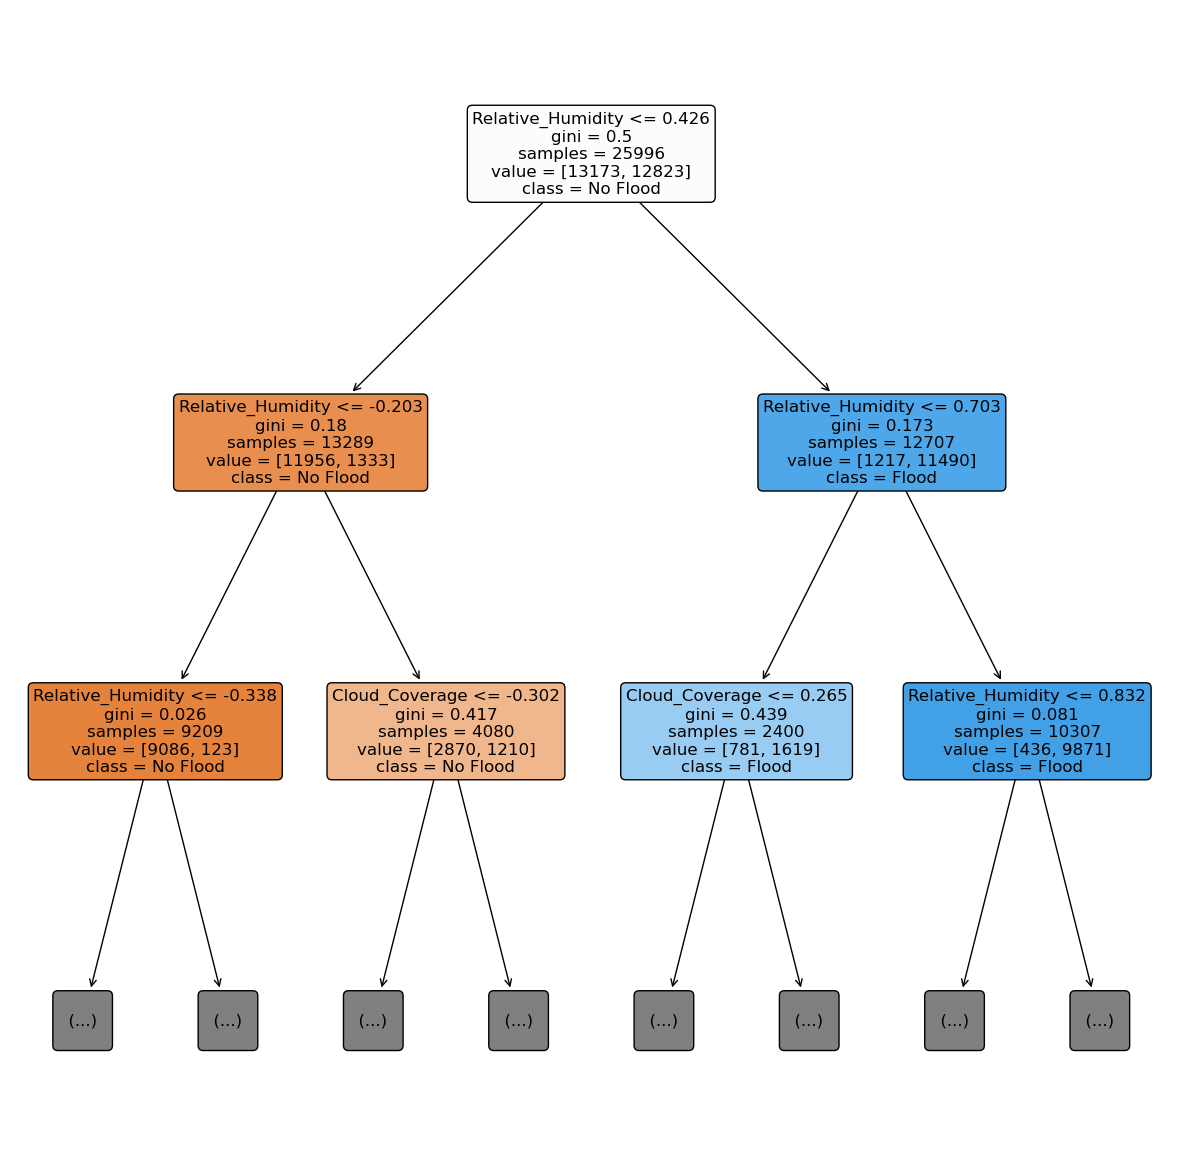

In [117]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dtree, filled=True, rounded=True, class_names = ["No Flood", 'Flood'],
         feature_names = X.columns, max_depth=2, fontsize=12)

plt.show()

In [118]:
dpred = dtree.predict(X_test)

#### Confusion Matrix

In [119]:
confusion_matrix_ = confusion_matrix(y_test, dpred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpred))

confusion_matrix: 
 [[2981  258]
 [ 275 2985]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3239
           1       0.92      0.92      0.92      3260

    accuracy                           0.92      6499
   macro avg       0.92      0.92      0.92      6499
weighted avg       0.92      0.92      0.92      6499



In [120]:
DTN = confusion_matrix_[0,0]
print("True Negatives = ", DTN)

DFN = confusion_matrix_[1,0]
print("False Negatives = ", DFN)

DFP = confusion_matrix_[0,1]
print("False Positives = ", DFP)

DTP = confusion_matrix_[1,1]
print("True Positives = ", DTP)

True Negatives =  2981
False Negatives =  275
False Positives =  258
True Positives =  2985


#### Test Accuracy

In [121]:
accuracy = accuracy_score(y_test,dpred)
print(accuracy)

0.9179873826742576


#### True Positive Rate, False Positive Rate

In [122]:
DTPR = np.round(DTP/(DTP+DFN), 2)
DFPR = np.round(DFP/(DFP+DTN), 2)

print("True Positive Rate = ", DTPR)
print("False Positive Rate = ", DFPR)

True Positive Rate =  0.92
False Positive Rate =  0.08


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

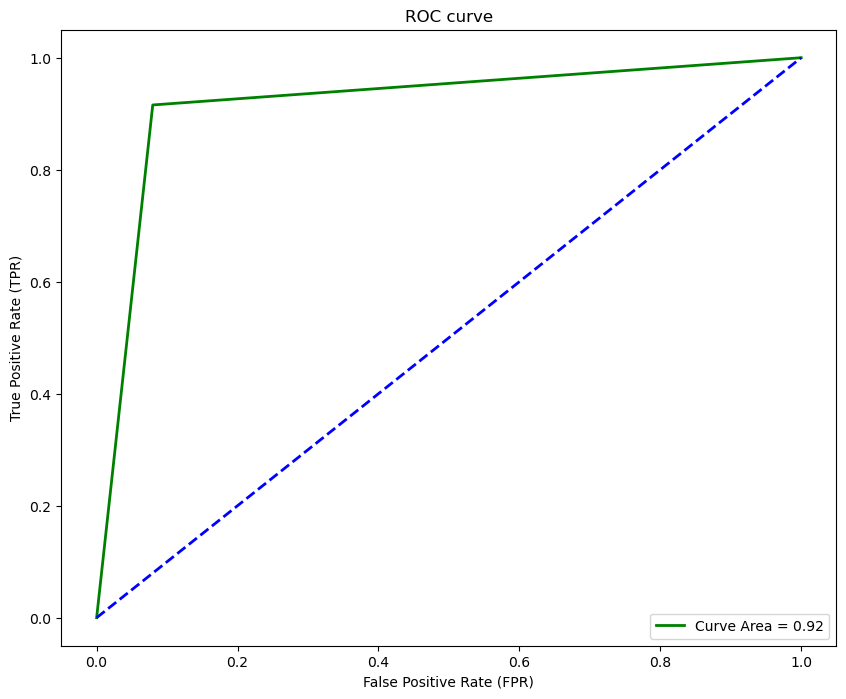

In [123]:
fpr, tpr, thr = roc_curve(y_test, dpred)
auc = np.round(roc_auc_score(y_test, dpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
dtree_params = {   
    "max_depth": range(1, 20, 2),
    "criterion": ['gini','entropy'],
    "max_features": ['auto'],
    "max_depth": range(3,20 , 1),
   
}

dtree = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

dfinal_model = dtree.set_params(**grid_result.best_params_)
dfinal_model.fit(X_train,y_train)
dpredh = dfinal_model.predict(X_test)

print(classification_report(y_test, dpredh))
print(confusion_matrix(y_test, dpredh))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3239
           1       0.91      0.92      0.92      3260

    accuracy                           0.92      6499
   macro avg       0.92      0.92      0.92      6499
weighted avg       0.92      0.92      0.92      6499

[[2952  287]
 [ 251 3009]]
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto'}


In [125]:
#X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period','Flood'],axis=1)
y = df_feat['Flood']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [126]:
# dtreeh = DecisionTreeClassifier(criterion = 'gini', max_depth = 19, max_features = 'auto')
# dtreeh.fit(X_train,y_train)

#### Training Accuracy

In [127]:
dpredh = dfinal_model.predict(X_train)

In [128]:
accuracy = accuracy_score(y_train,dpredh)
print(accuracy)

0.9663409755346977


#### Cross Validation

In [129]:
from sklearn.model_selection import cross_val_score,cross_val_predict
dtc_acc=cross_val_score(dfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
dtc_proba=cross_val_predict(dfinal_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [130]:
dtc_acc

array([0.91230769, 0.91556068, 0.91017503, 0.91729179, 0.91536834])

In [131]:
dtc_acc.mean()

0.9141407075325135

#### Test Accuracy

In [132]:
dpredht = dfinal_model.predict(X_test)

In [133]:
accuracy = accuracy_score(y_test,dpredht)
print(accuracy)

0.9172180335436221


In [134]:
confusion_matrix_ = confusion_matrix(y_test, dpredht)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpredht))

confusion_matrix: 
 [[2952  287]
 [ 251 3009]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3239
           1       0.91      0.92      0.92      3260

    accuracy                           0.92      6499
   macro avg       0.92      0.92      0.92      6499
weighted avg       0.92      0.92      0.92      6499



In [135]:
# plot_confusion_matrix(dtreeh, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

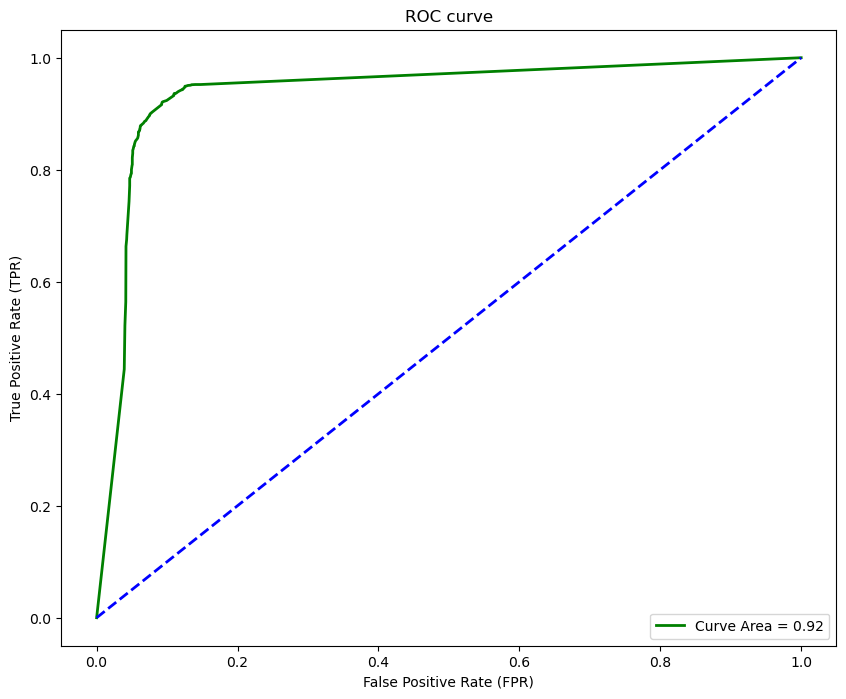

In [136]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, dpredht), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [137]:
#X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period','Flood'],axis=1)
y = df_feat['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [138]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(n_estimators=200)
#n_estimators=48, 83, 100, 120
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

#### Training Accuracy

In [139]:
rfc_pred = rfc.predict(X_train)

In [140]:
accuracy = accuracy_score(y_train,rfc_pred)
print(accuracy)

0.9998461301738729


#### Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rfc_acc=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
rfc_proba=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [142]:
rfc_acc

array([0.94634615, 0.93998846, 0.94248894, 0.94864397, 0.9530679 ])

In [143]:
rfc_acc.mean()

0.9461070842025834

#### Test Accuracy

In [144]:
rfc_pred = rfc.predict(X_test)

In [145]:
accuracy = accuracy_score(y_test,rfc_pred)
print(accuracy)

0.9462994306816433


#### Confusion Matrix

In [146]:
confusion_matrix_ = confusion_matrix(y_test, rfc_pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, rfc_pred))

confusion_matrix: 
 [[3032  207]
 [ 142 3118]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3239
           1       0.94      0.96      0.95      3260

    accuracy                           0.95      6499
   macro avg       0.95      0.95      0.95      6499
weighted avg       0.95      0.95      0.95      6499



In [147]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3032
False Negatives =  142
False Positives =  207
True Positives =  3118


#### True Positive Rate, False Positive Rate

In [148]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.96
False Positive Rate =  0.06


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

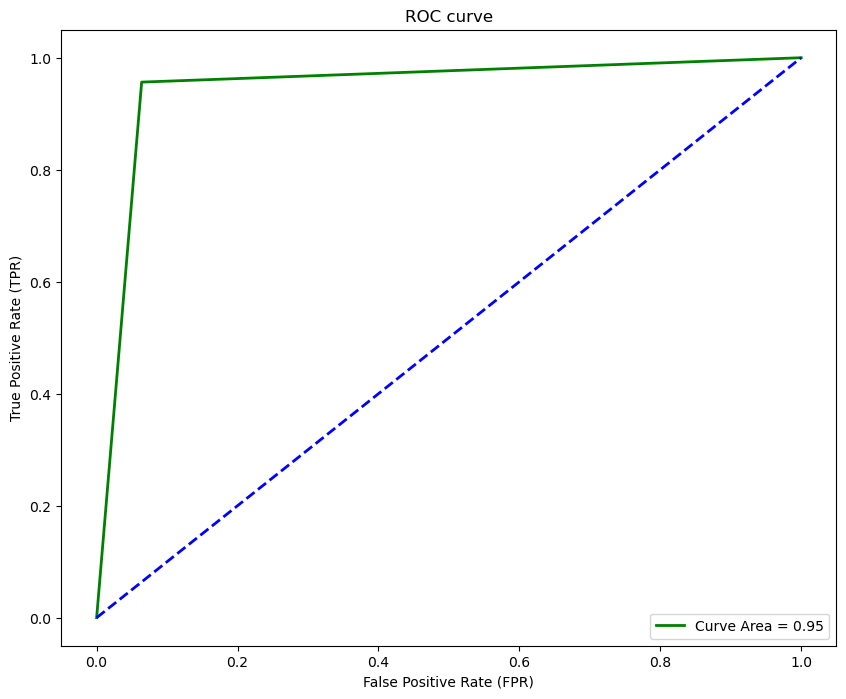

In [149]:
fpr, tpr, thr = roc_curve(y_test, rfc_pred)
auc = np.round(roc_auc_score(y_test, rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


In [150]:
# plot_confusion_matrix(rfc, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

In [151]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# seed=50
# rf_params = {   
#     "n_estimators": [100, 200, 300],
#     "max_depth": range(1, 20, 2),
#     "criterion": ['gini','entropy'],
#     "max_features": ['auto'],
# }

# rf = RandomForestClassifier()

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
# grid_result = grid_search.fit(X_train,y_train)

# rf_final_model = rf.set_params(**grid_result.best_params_)
# rf_final_model.fit(X_train,y_train)
# rf_predh = rf_final_model.predict(X_test)

# print(classification_report(y_test, rf_predh))
# print(confusion_matrix(y_test, rf_predh))

# print(grid_result.best_params_)

In [152]:
# predh = rf_final_model.predict(X_train)

In [153]:
# accuracy = accuracy_score(y_train,predh)
# print(accuracy)

#### SVC

In [154]:
#X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period','Flood'],axis=1)
y = df_feat['Flood']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [155]:
from sklearn.svm import SVC
svc_algo = SVC(C=1000,gamma=1,random_state=50,probability=True)


In [156]:
svc_algo.fit(X_train,y_train)

SVC(C=1000, gamma=1, probability=True, random_state=50)

#### Training Accuracy

In [157]:
svc_pred = svc_algo.predict(X_train)

In [158]:
accuracy = accuracy_score(y_train,svc_pred)
print(accuracy)

0.9421834128327435


#### Cross Validation

In [159]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc=cross_val_score(svc_algo,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
svc_proba=cross_val_predict(svc_algo,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [160]:
svc_acc

array([0.92653846, 0.92229275, 0.91844585, 0.92190806, 0.92806309])

In [161]:
svc_acc.mean()

0.9234496426827643

#### Test Accuracy

In [162]:
svc_pred = svc_algo.predict(X_test)

In [163]:
accuracy = accuracy_score(y_test,svc_pred)
print(accuracy)

0.9218341283274349


#### Confusion Matrix

In [164]:
confusion_matrix_ = confusion_matrix(y_test, svc_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, svc_pred))

confusion_matrix: 
 [[2896  343]
 [ 165 3095]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3239
           1       0.90      0.95      0.92      3260

    accuracy                           0.92      6499
   macro avg       0.92      0.92      0.92      6499
weighted avg       0.92      0.92      0.92      6499



In [165]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  2896
False Negatives =  165
False Positives =  343
True Positives =  3095


#### True Positive Rate, False Positive Rate

In [166]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.95
False Positive Rate =  0.11


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

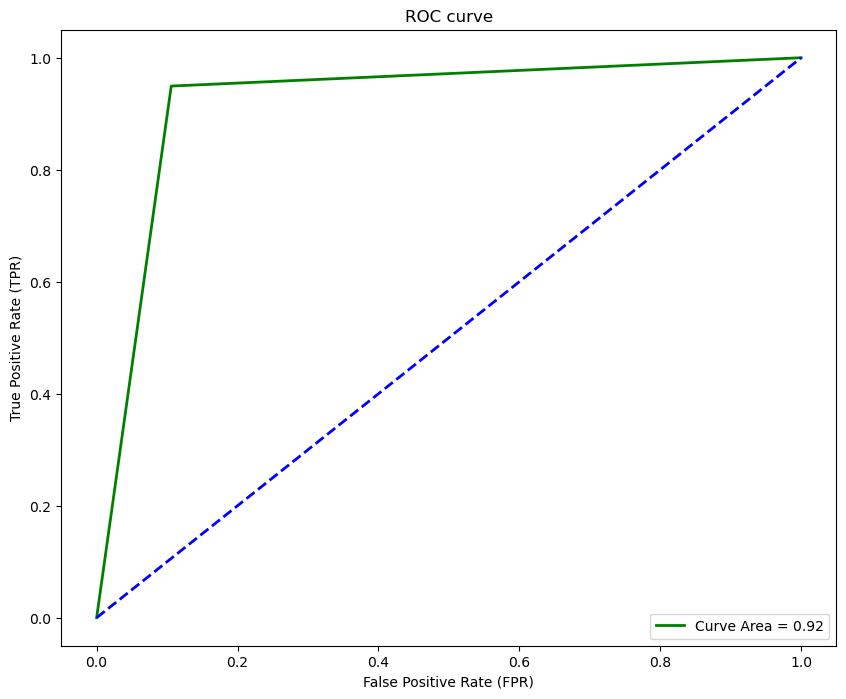

In [167]:
fpr, tpr, thr = roc_curve(y_test, svc_pred)
auc = np.round(roc_auc_score(y_test, svc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [168]:
# plot_confusion_matrix(svc_algo, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

#### Xg Boost

In [169]:
X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period','Flood'],axis=1)
y = df_feat['Flood']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [170]:
from xgboost import XGBClassifier

In [171]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")

In [172]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Training Accuracy 

In [173]:
xgb_pred = xgb_model.predict(X_train)

In [174]:
accuracy = accuracy_score(y_train,xgb_pred)
print(accuracy)

0.9824203723649793


#### Cross Validation

In [175]:
from sklearn.model_selection import cross_val_score,cross_val_predict
xgb_acc=cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
xgb_proba=cross_val_predict(xgb_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [176]:
xgb_acc

array([0.96211538, 0.95922293, 0.95845355, 0.95922293, 0.96268513])

In [177]:
xgb_acc.mean()

0.9603399840205956

#### Test Accuracy

In [178]:
xgb_pred = xgb_model.predict(X_test)

In [179]:
accuracy = accuracy_score(y_test,xgb_pred)
print(accuracy)

0.9621480227727343


#### Confusion Matrix

In [180]:
confusion_matrix_ = confusion_matrix(y_test, xgb_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, xgb_pred))

confusion_matrix: 
 [[3113  126]
 [ 120 3140]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3239
           1       0.96      0.96      0.96      3260

    accuracy                           0.96      6499
   macro avg       0.96      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499



In [181]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3113
False Negatives =  120
False Positives =  126
True Positives =  3140


In [182]:
# plot_confusion_matrix(xgb_model, 
#                       X_test, 
#                       y_test, 
#                       display_labels=["No Flood", "Flood"],
#                       cmap='Blues')
# plt.show()

#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

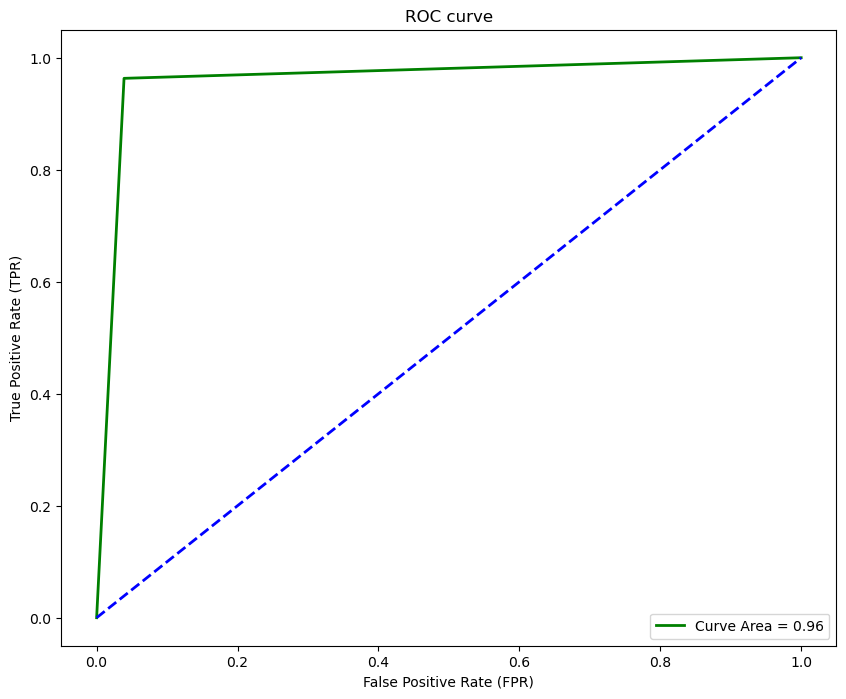

In [183]:
fpr, tpr, thr = roc_curve(y_test, xgb_pred)
auc = np.round(roc_auc_score(y_test, xgb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [118]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#{'leaf_size': 26, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
models.append(('KNN', KNeighborsClassifier(leaf_size = 26, metric ='manhattan', n_neighbors = 1, weights = 'uniform')))
models.append(('DTC', DecisionTreeClassifier(criterion = 'gini', max_depth = 19, max_features = 'auto', random_state=50)))
models.append(('RFC', RandomForestClassifier(random_state=50)))
models.append(('SVC', SVC(C=1000,gamma=1,random_state=50,probability=True)))
models.append(('XG Boost', XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")))

names = []
scores = []
rec = []
pre = []
f = []
roc = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(round((accuracy_score(y_test, y_pred)*100), 2))
    pre.append(round((precision_score(y_test,y_pred)*100), 2))
    rec.append(round((recall_score(y_test,y_pred)*100), 2))           
    f.append(round((f1_score(y_test,y_pred)*100), 2))          
    roc.append(round((roc_auc_score(y_test,y_pred)*100), 2))
    
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': pre, 'Recall': rec, "F1-Score": f, "ROC Score": roc})
tr_split


,Name,Accuracy,Precision,Recall,F1-Score,ROC Score
0,KNN,96.91,94.84,99.28,97.01,96.88
1,DTC,96.74,94.83,98.94,96.84,96.72
2,RFC,97.85,96.35,99.52,97.91,97.83
3,SVC,93.66,92.95,94.63,93.79,93.65
4,XG Boost,96.21,95.38,97.20,96.28,96.20


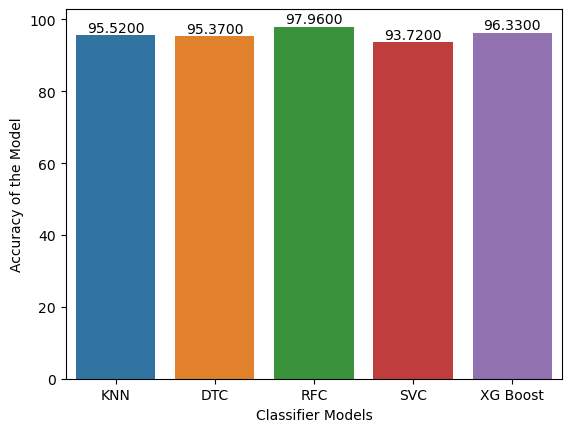

In [119]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Accuracy', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

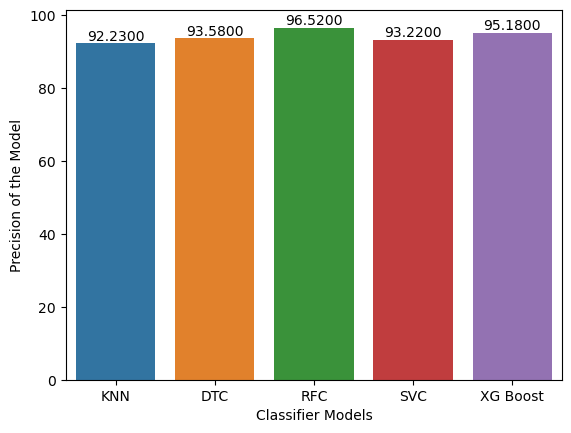

In [120]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Precision', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Precision of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

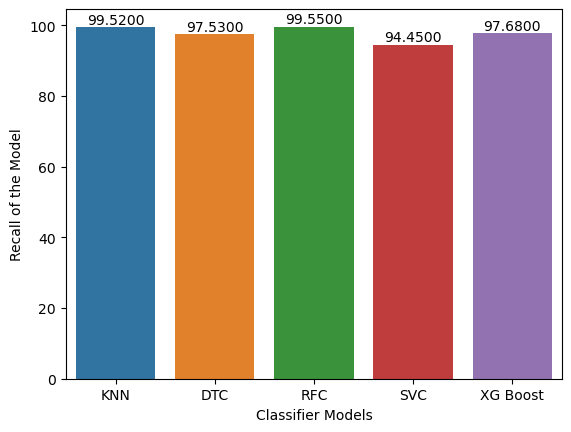

In [121]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Recall', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Recall of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

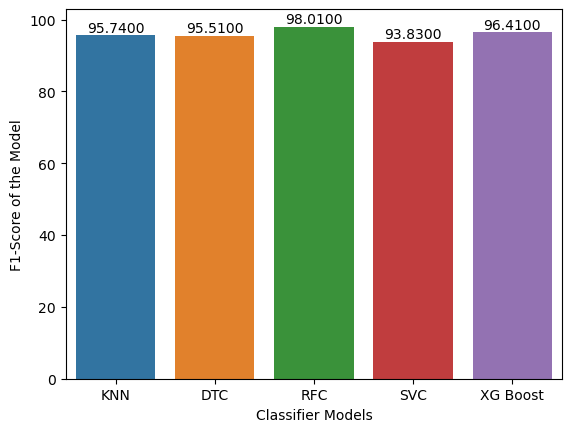

In [122]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'F1-Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='F1-Score of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

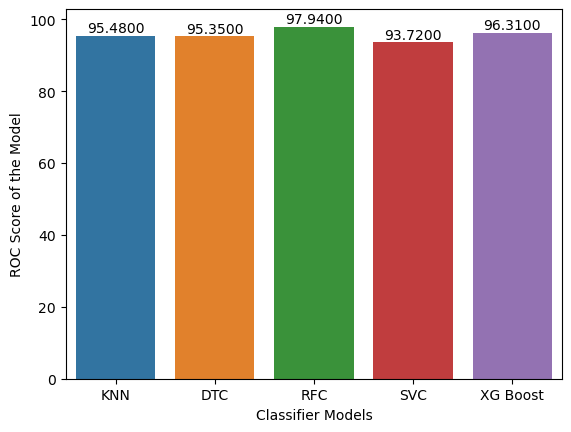

In [123]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'ROC Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='ROC Score of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()
